# Declaration of Originality

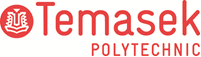

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Adrian Tan Wen Kang(2405110D)
* Tutorial Group                :  P02
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Business Understanding

Goal:

To predict whether a customer will subscribe to a term deposit
based on demographic and marketing campaign data,
so that the bank can target high-probability customers
and improve campaign efficiency

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH= "bank-full.csv"
df = pd.read_csv(FILE_PATH, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Remove rows with "unknown"
df = df[~df.isin(['unknown']).any(axis=1)]
print("Shape after removing 'unknown' rows:", df.shape)

df

Shape after removing 'unknown' rows: (7842, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


## 2.2 Summary Statistics

In [5]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [6]:
## Check for missing data
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
## Describe data distribution
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,7842.000000,7842,7842,7842,7842,7842.000000,7842,7842,7842,7842.000000,7842,7842.000000,7842.000000,7842.000000,7842.000000,7842,7842
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,1753,4501,4197,7786,NaN,4942,6753,7257,NaN,2436,NaN,NaN,NaN,NaN,4679,6056
mean,40.783856,NaN,NaN,NaN,NaN,1552.343280,NaN,NaN,NaN,14.260010,NaN,261.290615,2.064269,223.252869,3.184264,NaN,NaN
std,11.282964,NaN,NaN,NaN,NaN,3084.580003,NaN,NaN,NaN,7.885328,NaN,236.203272,1.566109,111.830127,4.614190,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-1884.000000,NaN,NaN,NaN,1.000000,NaN,5.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,162.000000,NaN,NaN,NaN,7.000000,NaN,113.000000,1.000000,133.000000,1.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,595.000000,NaN,NaN,NaN,14.000000,NaN,194.000000,2.000000,195.000000,2.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,1733.750000,NaN,NaN,NaN,20.000000,NaN,324.000000,2.000000,326.000000,4.000000,NaN,NaN


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

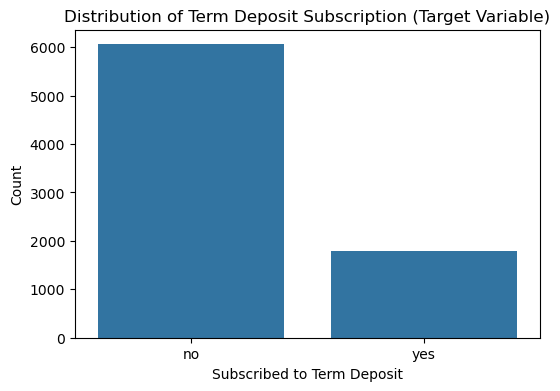

y
no     0.772252
yes    0.227748
Name: proportion, dtype: float64

In [8]:
## Understanding distribution of target
# Count plot of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title("Distribution of Term Deposit Subscription (Target Variable)")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()
df['y'].value_counts(normalize=True)

### 2.3.1.2 Understanding distribution of features

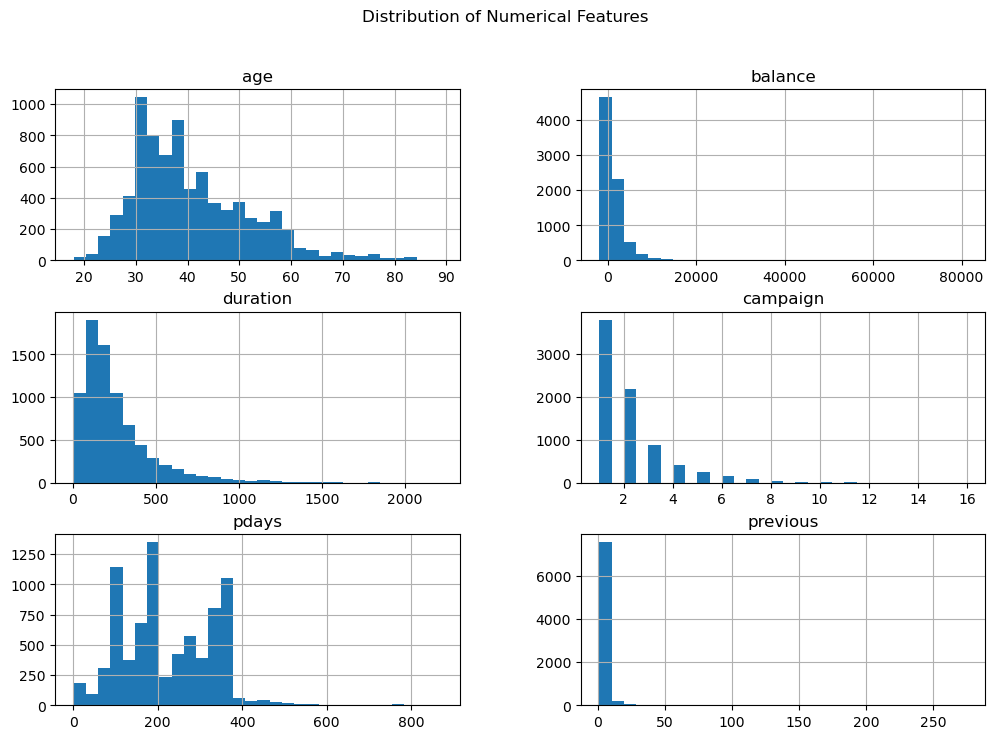

In [9]:
## Understanding distribution of features

##Numerical Feature Distributions
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

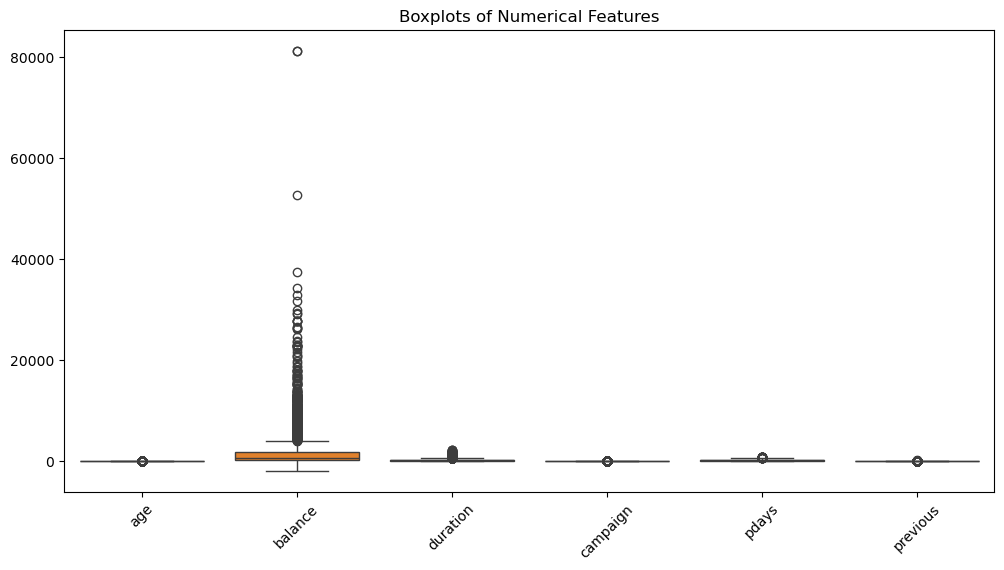

In [10]:
##Boxplots (Outliers)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

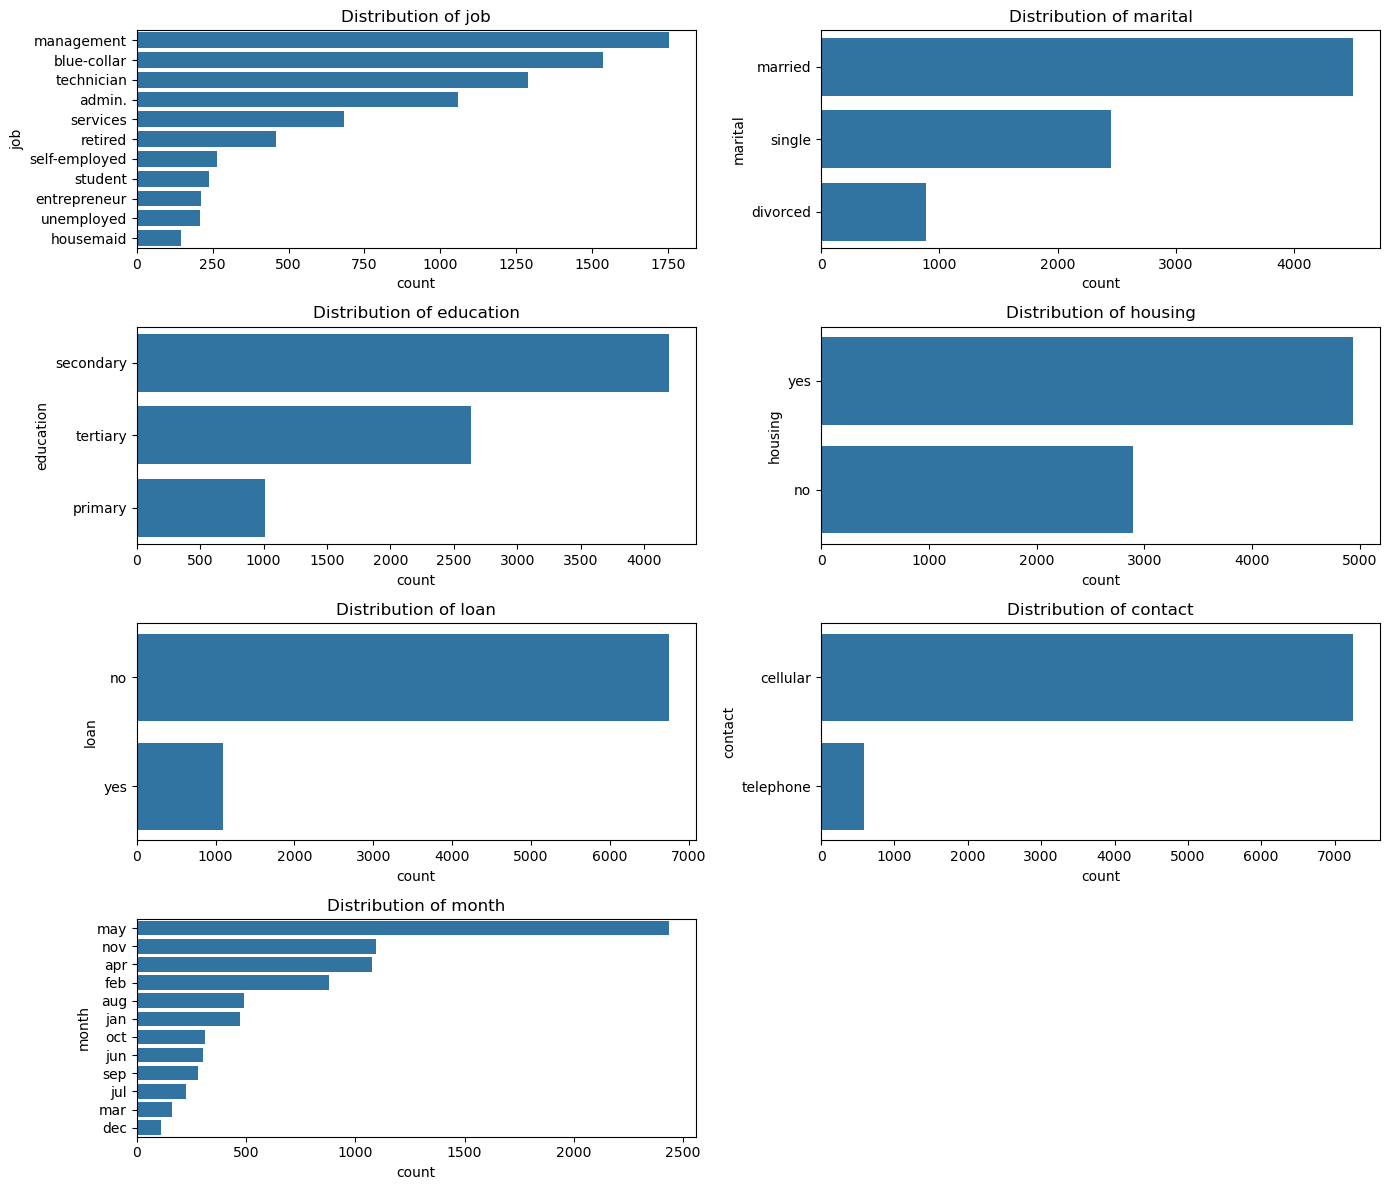

In [11]:
##Categorical Feature Distributions

cat_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']

plt.figure(figsize=(14, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### 2.3.2 Understanding relationship between variables

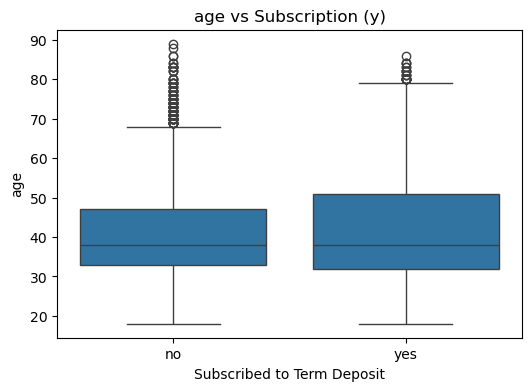

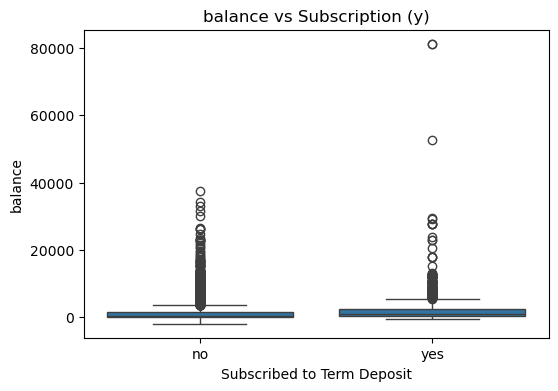

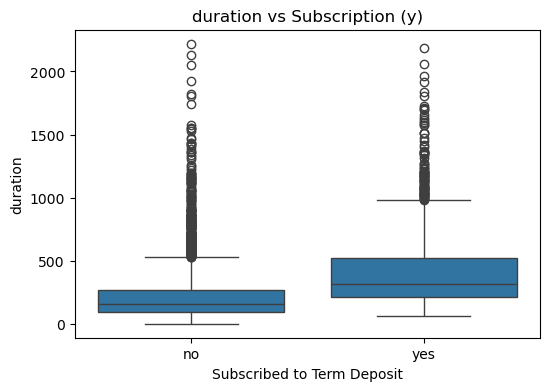

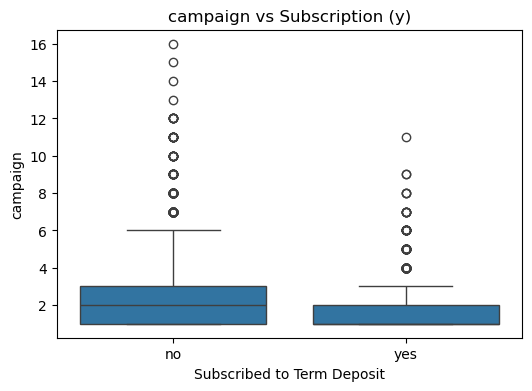

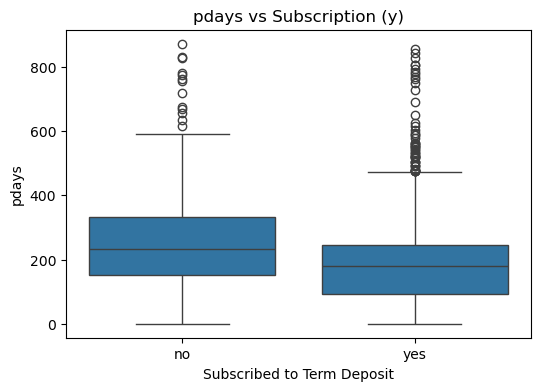

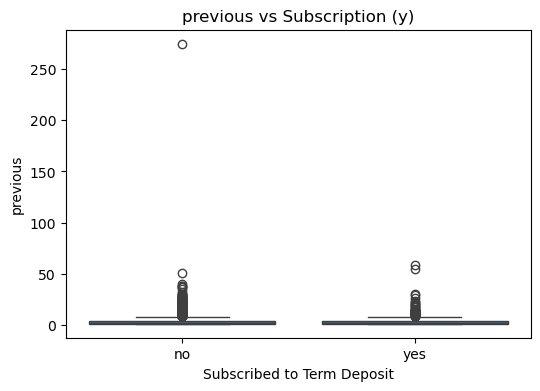

In [12]:
## Understanding relationship between variables
##Numerical Features vs Target

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"{col} vs Subscription (y)")
    plt.xlabel("Subscribed to Term Deposit")
    plt.ylabel(col)
    plt.show()

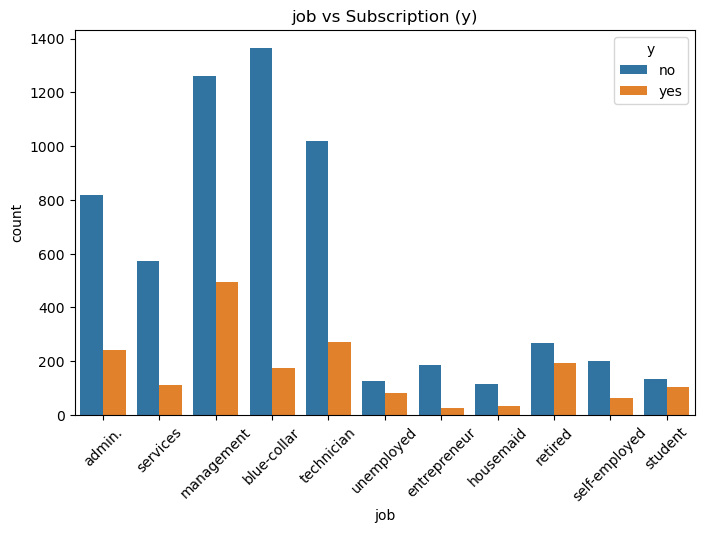

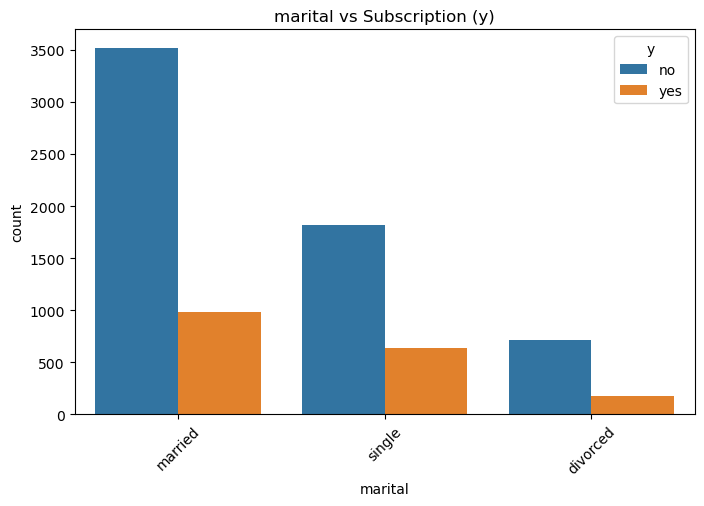

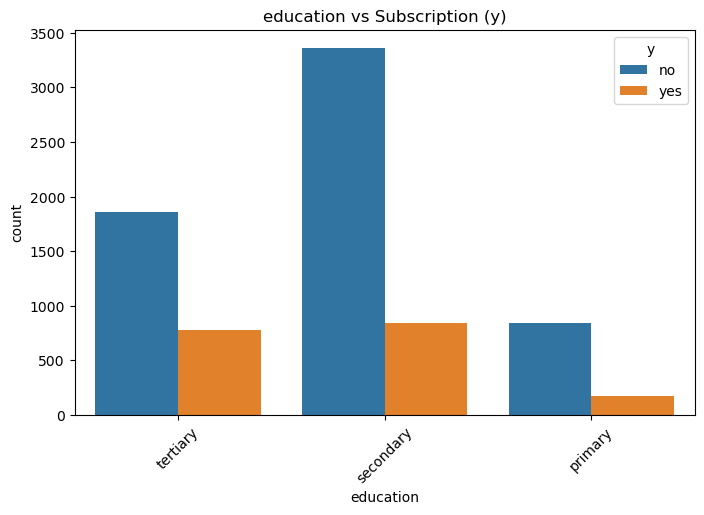

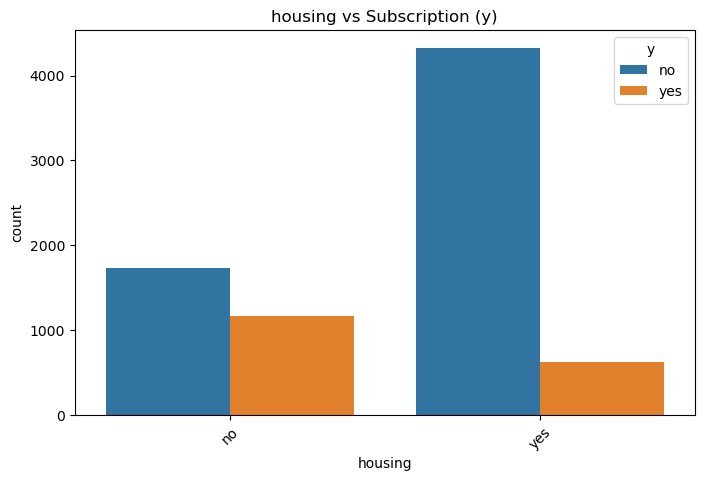

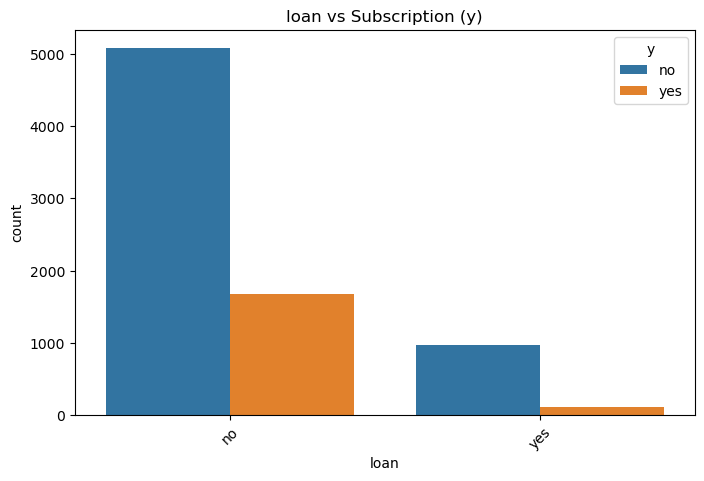

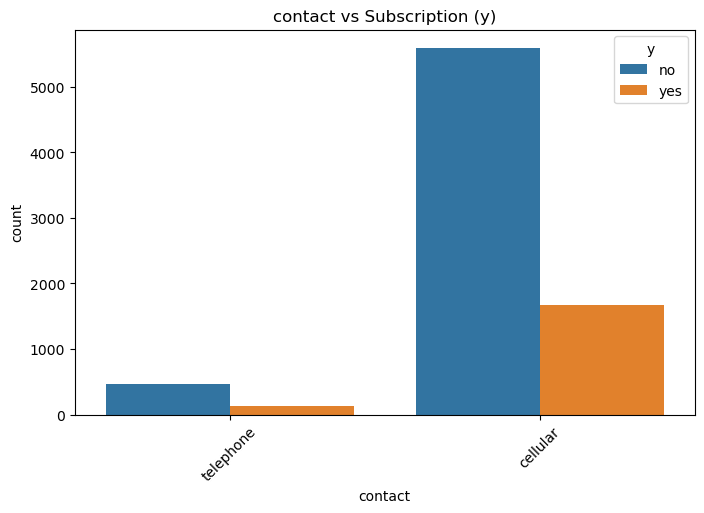

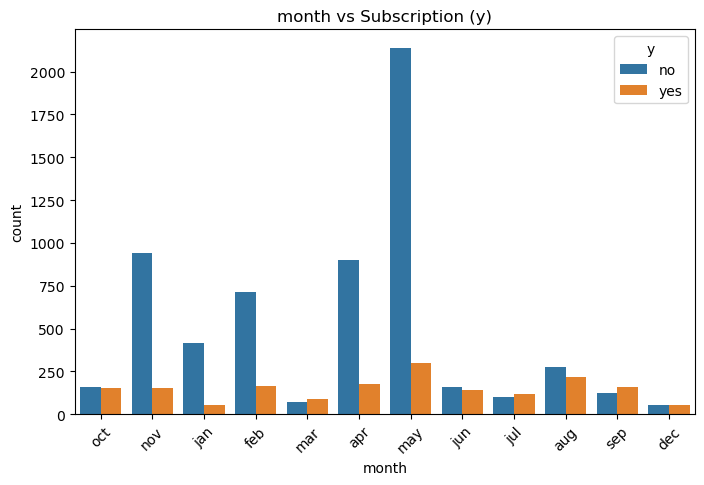

In [13]:
##Categorical Features vs Target

cat_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']

for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"{col} vs Subscription (y)")
    plt.xticks(rotation=45)
    plt.show()


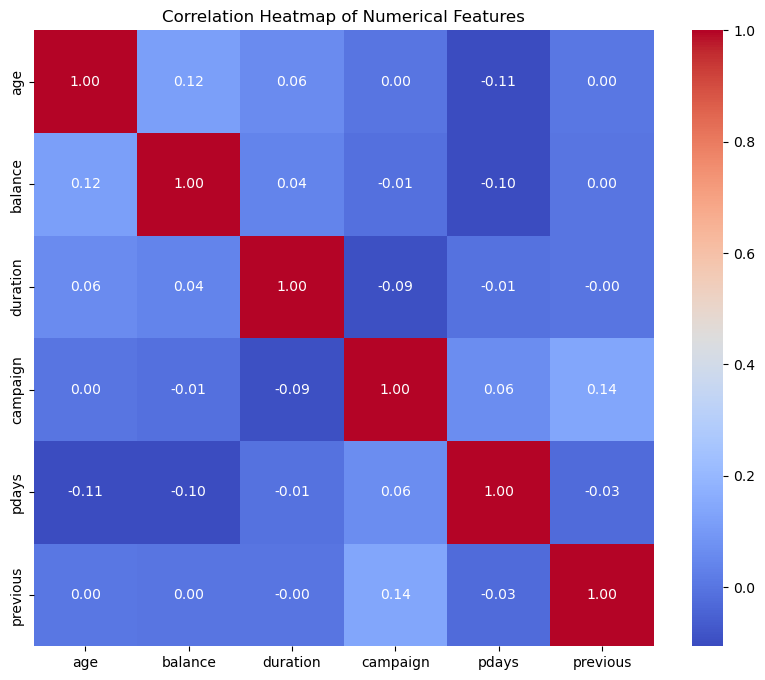

In [14]:
##Correlation Between Numerical Variable

plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [39]:
## Clean data

col_categorical = df.select_dtypes(include=['object']).columns

for col in df[col_categorical]:

    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')

    print("Number of duplicate rows:", df.duplicated().sum())

    df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)




job (6): ['admin.' 'services' 'management' 'blue-collar' 'technician' 'other']
Number of duplicate rows: 0
marital (3): ['married' 'single' 'divorced']
Number of duplicate rows: 0
education (3): ['tertiary' 'secondary' 'primary']
Number of duplicate rows: 0
default (2): ['no' 'yes']
Number of duplicate rows: 0
housing (2): ['no' 'yes']
Number of duplicate rows: 0
loan (2): ['no' 'yes']
Number of duplicate rows: 0
contact (2): ['telephone' 'cellular']
Number of duplicate rows: 0
month (12): ['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']
Number of duplicate rows: 0
poutcome (3): ['failure' 'other' 'success']
Number of duplicate rows: 0
y (2): ['no' 'yes']
Number of duplicate rows: 0
Shape after removing duplicates: (7842, 17)


## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set
# Define target column
y = df['y'].map({'yes': 1, 'no': 0})

# Drop target from feature set
X = df.drop(['y'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)



In [24]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2025,
    stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (5489, 28)
X_test shape : (2353, 28)
y_train shape: (5489,)
y_test shape : (2353,)


# 4. Modelling

### 4.2 Train Model

In [52]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

baseline = DummyClassifier(strategy="most_frequent")

baseline.fit(X_train, y_train)

y_base_pred = baseline.predict(X_test)

print("BASELINE MODEL")
print("Accuracy:", accuracy_score(y_test, y_base_pred))
print("F1-score:", f1_score(y_test, y_base_pred))

BASELINE MODEL
Accuracy: 0.7722056948576286
F1-score: 0.0


In [53]:
from sklearn.linear_model import LogisticRegression

# Initialise the model
model = LogisticRegression(max_iter=1000, random_state=2025)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

y_pred[:10], y_proba[:10]


c:\Users\magic\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0.05042563, 0.06109756, 0.12222732, 0.13721078, 0.08343027,
        0.0406672 , 0.22063876, 0.55975211, 0.04101499, 0.0505524 ]))

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=3000,
    solver='lbfgs',
    random_state=2025
)

model.fit(X_train, y_train)


c:\Users\magic\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=2025
)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=2025
)

gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [71]:
## Evaluate model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification metrics
print("LOGISTIC REGRESSION")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)



LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1817
           1       0.66      0.52      0.58       536

    accuracy                           0.83      2353
   macro avg       0.76      0.72      0.74      2353
weighted avg       0.82      0.83      0.82      2353

ROC-AUC Score: 0.8649179802692646


In [73]:
# random forest evaluation
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("")
print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score:", roc_auc_rf)

print("F1-score:", f1_score(y_test, y_pred_rf))


RANDOM FOREST
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1817
           1       0.70      0.57      0.63       536

    accuracy                           0.85      2353
   macro avg       0.79      0.75      0.77      2353
weighted avg       0.84      0.85      0.84      2353

ROC-AUC Score: 0.9019680422871881
F1-score: 0.6302780638516993


In [74]:
# gradient boosting evaluation
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("")
print("GRADIENT BOOSTING")
print(classification_report(y_test, y_pred_gb))

roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
print("ROC-AUC Score:", roc_auc_gb)

print("F1-score:", f1_score(y_test, y_pred_gb))
print("")


GRADIENT BOOSTING
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1817
           1       0.70      0.62      0.66       536

    accuracy                           0.85      2353
   macro avg       0.80      0.77      0.78      2353
weighted avg       0.85      0.85      0.85      2353

ROC-AUC Score: 0.9008319026770386
F1-score: 0.6567164179104478



# HYPERPARAMETER TUNING

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Tune Random Forest (vary TWO hyperparameters)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=2025),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='f1',
    random_state=2025,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("BEST PARAMETERS (Random Forest):")
print(rf_random.best_params_)

# Evaluate tuned model
best_rf = rf_random.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

print("\nTUNED RANDOM FOREST")
print(classification_report(y_test, y_pred_rf_tuned))

roc_auc_rf_tuned = roc_auc_score(y_test, y_proba_rf_tuned)
print("ROC-AUC Score:", roc_auc_rf_tuned)
print("F1-score:", f1_score(y_test, y_pred_rf_tuned))

BEST PARAMETERS (Random Forest):
{'n_estimators': 200, 'max_depth': 20}

TUNED RANDOM FOREST
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1817
           1       0.70      0.59      0.64       536

    accuracy                           0.85      2353
   macro avg       0.79      0.76      0.77      2353
weighted avg       0.84      0.85      0.84      2353

ROC-AUC Score: 0.9035867717001125
F1-score: 0.640973630831643


In [76]:
results = pd.DataFrame({
    "Model": ["Baseline", "Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_base_pred),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ],
    "F1-score": [
        f1_score(y_test, y_base_pred),
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb)
    ],
    "ROC-AUC": [
        "N/A",
        roc_auc,
        roc_auc_rf,
        roc_auc_gb
    ]
})

print(results)

                 Model  Accuracy  F1-score   ROC-AUC
0             Baseline  0.772206  0.000000       N/A
1  Logistic Regression  0.829579  0.581856  0.864918
2        Random Forest  0.847429  0.630278  0.901968
3    Gradient Boosting  0.853379  0.656716  0.900832


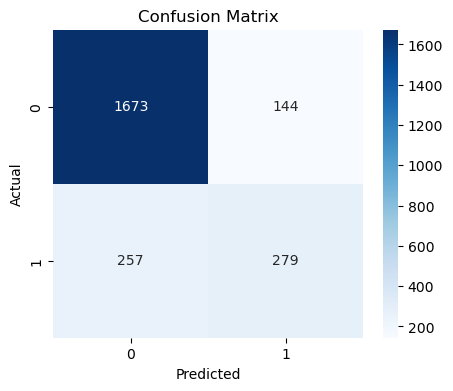

<Figure size 800x600 with 0 Axes>

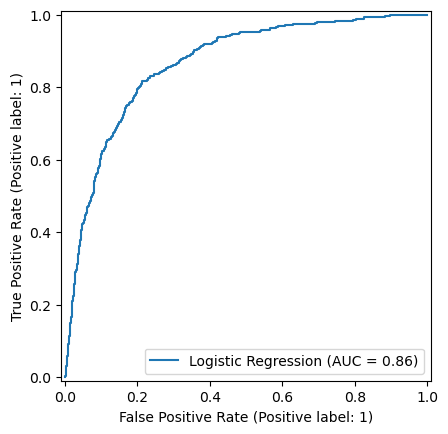

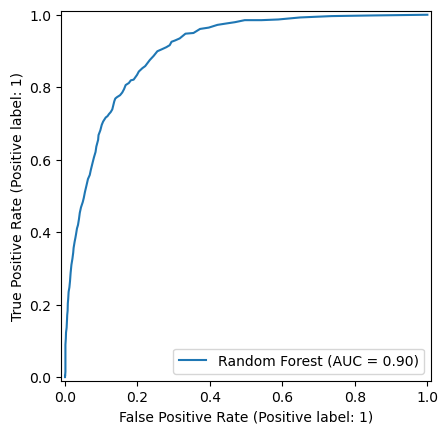

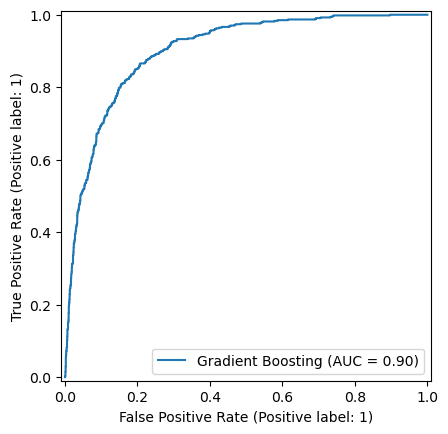

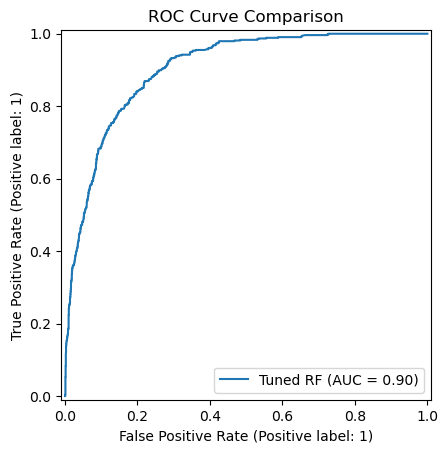

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))

RocCurveDisplay.from_predictions(y_test, y_proba, name="Logistic Regression")
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest")
RocCurveDisplay.from_predictions(y_test, y_proba_gb, name="Gradient Boosting")
RocCurveDisplay.from_predictions(y_test, y_proba_rf_tuned, name="Tuned RF")

plt.title("ROC Curve Comparison")
plt.show()

In [78]:
## New data
new_data = X_test.iloc[[0]]
## Predict
new_pred = model.predict(new_data)
new_proba = model.predict_proba(new_data)

new_pred, new_proba

(array([0]), array([[0.955148, 0.044852]]))

## Iterative model development


In [82]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# --- Feature Selection using SelectKBest (ANOVA F-test) ---
selector = SelectKBest(score_func=f_classif, k=15)

# Create pipeline with feature selection + model
from sklearn.preprocessing import StandardScaler

fs_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('selector', selector),
    ('classifier', LogisticRegression(max_iter=5000, random_state=2025))
])

# Train
fs_model.fit(X_train, y_train)

# Predict
y_pred_fs = fs_model.predict(X_test)

# Evaluate
f1_fs = f1_score(y_test, y_pred_fs)
print("F1-score after Feature Selection:", f1_fs)

print("\nComparison: Original Logistic vs Feature Selected Logistic")
print("Original F1:", f1_score(y_test, y_pred))
print("After Feature Selection F1:", f1_fs)

F1-score after Feature Selection: 0.5788923719958202

Comparison: Original Logistic vs Feature Selected Logistic
Original F1: 0.5818561001042752
After Feature Selection F1: 0.5788923719958202


In [83]:
# Final model (the one you chose)
best_model = RandomForestClassifier(random_state=2025)
best_model.fit(X_train, y_train)

# Save model
import joblib
joblib.dump(best_model, "model.pkl")

print("Model saved successfully!")


Model saved successfully!
